##  Sklearn to get an idea of the data I've got


- AH - Air Humidity (0-100%) AKA Relative Humidity
- AT - Air Temperature (°C)
- BCOCF - Brine-Condensate Outlet Combined flow 
- CIT - Condenser Inlet Temperature
- COT - Condenser Outlet Temperature
- CP - Condenser Pressure (Outlet) bar
- KW - Parasitic load (kW)
- MW - Turbine power 
- NCGOT - Non-condensable gas outlet temperature
- PHBOT - Preheater brine outlet temperature
- PHMFIT - Preheater motive fluid inlet temperature
- PHMFOT - Preheater motive fluid outlet temperature
- SD - Pump speed
- SIF - Steam inlet flow
- SIT - Steam inlet temperature
- TOT - Turbine outlet temperature
- VMFL - vaporizer motive fluid level
- VMFOT - vaporizer motive fluid outlet temperature
- VP - vaporizer pressure



In [5]:
import pickle
import pandas
import os
import torch
import seaborn as sns
import matplotlib.pyplot as plt



with open('../reconcile_all.pk1', 'rb') as f:
    df = pickle.load(f)



In [7]:
# Print all column names
print(df.columns)

Index(['VMFL', 'VP', 'MW', 'KW', 'AT', 'AH', 'SIT', 'SIF', 'CP', 'BCOCF',
       'COT', 'PHBOT', 'PHMFOT', 'VMFOT', 'NCGOT', 'SD', 'CIT', 'TOT', 'm_WF',
       'm_condensate', 'm_WF2', 'pump_power', 'PHMFIT'],
      dtype='object')


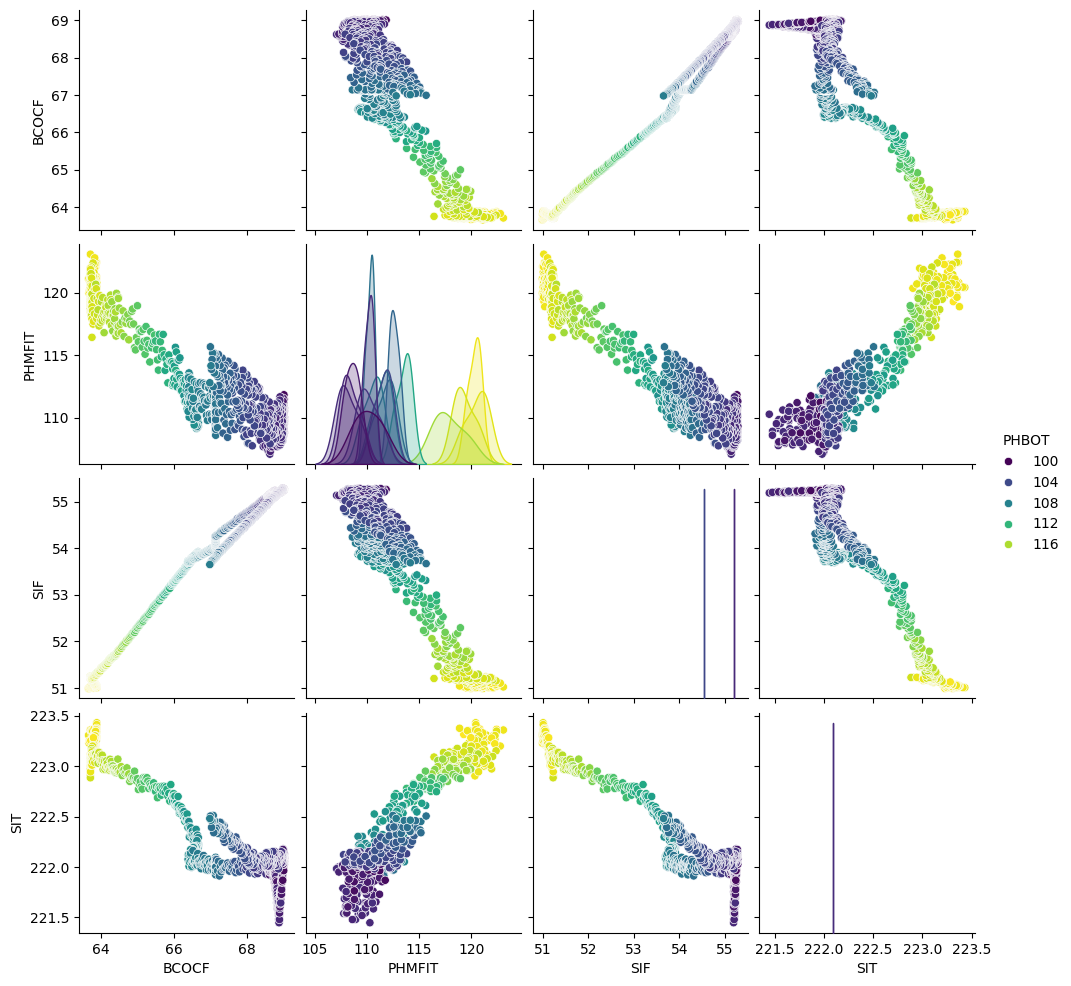

In [8]:
head = df[1000:2000]
sns.pairplot(head[['BCOCF', 'PHMFIT', 'SIF','SIT', 'PHBOT']], hue='PHBOT', palette='viridis')

There definitely looks like theres some separation here, and so it should be possible to do a decent algorithm on this.

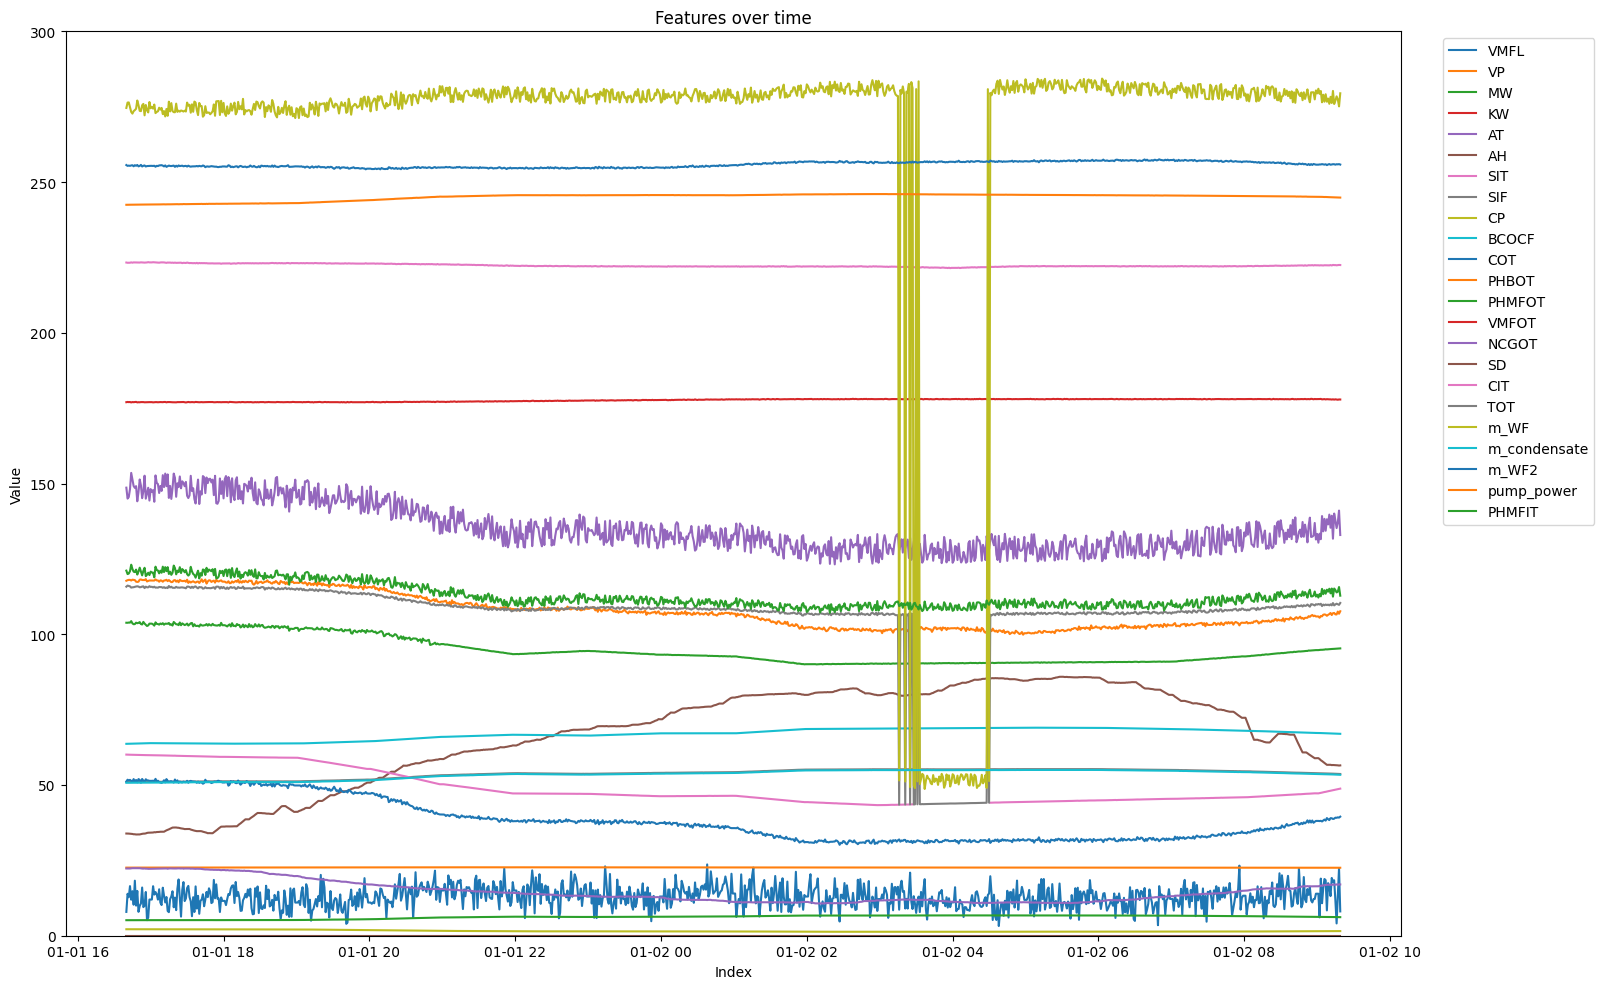

In [ ]:
# # Do a line graph of each feature over time
plt.figure(figsize=(16, 10))
for col in head.columns:
    plt.plot(head.index, head[col], label=col)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Features over time')
plt.ylim(0, 300)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

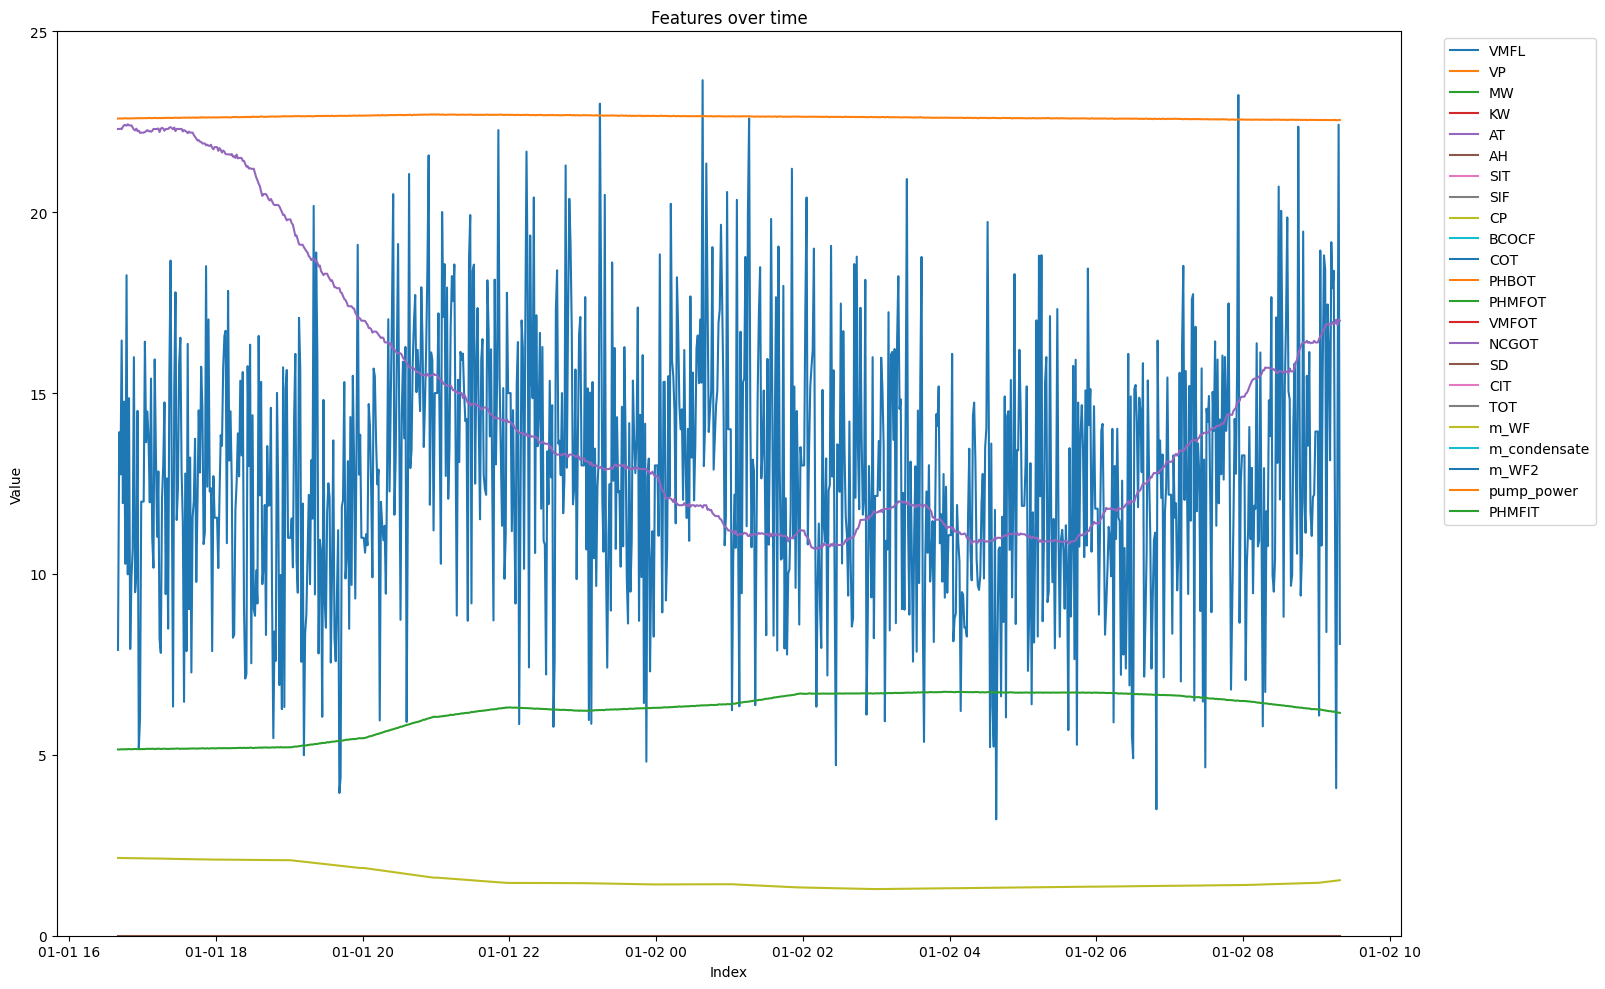

In [11]:
plt.figure(figsize=(16, 10))
for col in head.columns:
    plt.plot(head.index, head[col], label=col)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Features over time')
plt.ylim(0, 25)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

Lets try some Sklearn algorithms on this

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
head2 = head[['BCOCF', 'PHMFIT', 'SIF', 'SIT', 'PHBOT']]
X = head2.drop(columns=['PHBOT'])
y = head2['PHBOT']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.22


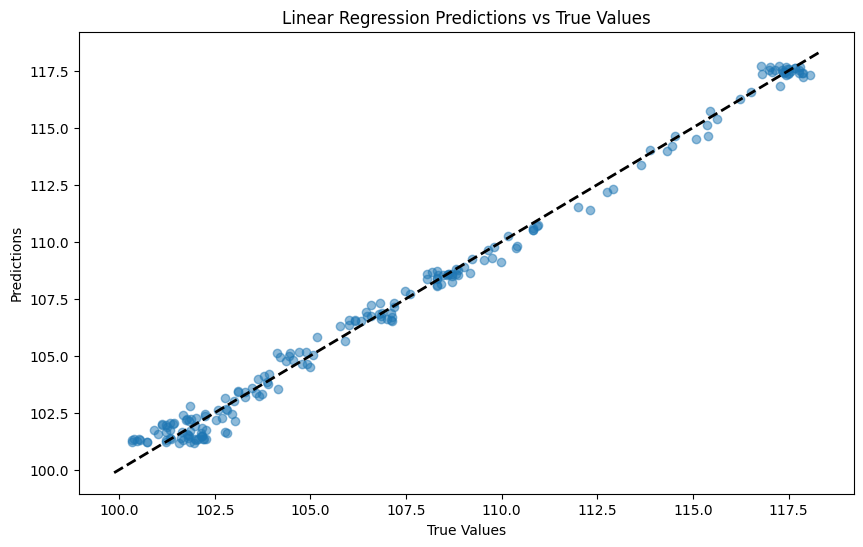

In [19]:
# plot the predictions against the true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions vs True Values')
plt.show()

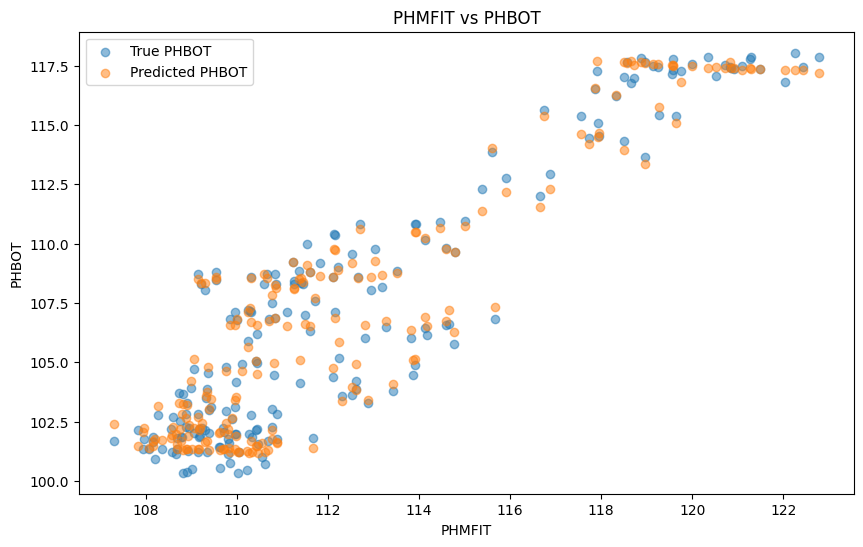

In [20]:
# plot PHMFIT against PHBOT, for true and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PHMFIT'], y_test, label='True PHBOT', alpha=0.5)
plt.scatter(X_test['PHMFIT'], y_pred, label='Predicted PHBOT',
            alpha=0.5)
plt.xlabel('PHMFIT')
plt.ylabel('PHBOT')
plt.legend()
plt.title('PHMFIT vs PHBOT')
plt.show()

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train XGBoost regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")

XGBoost Mean Squared Error: 0.17


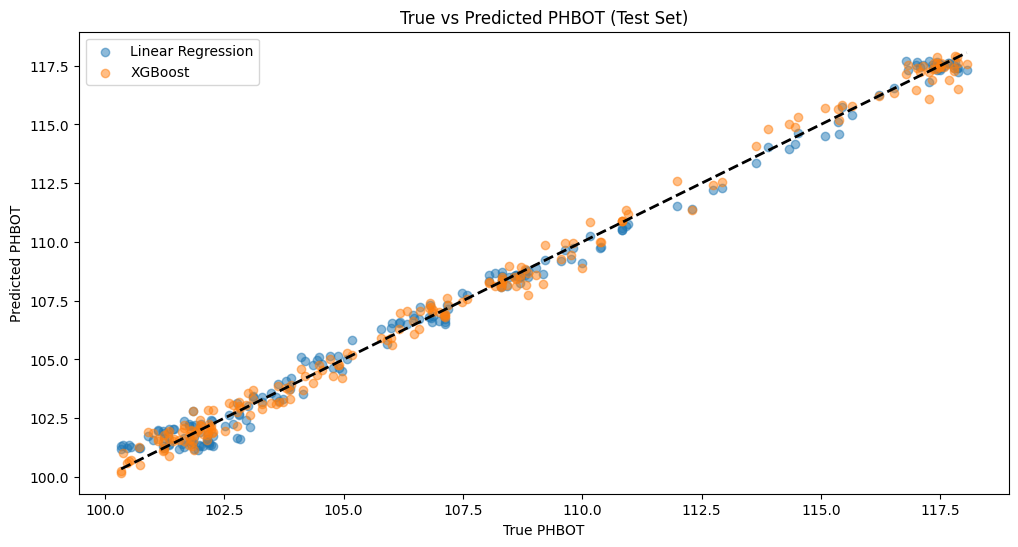

In [23]:
# Visualize the true vs predicted values for both models

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True PHBOT')
plt.ylabel('Predicted PHBOT')
plt.title('True vs Predicted PHBOT (Test Set)')
plt.legend()
plt.show()

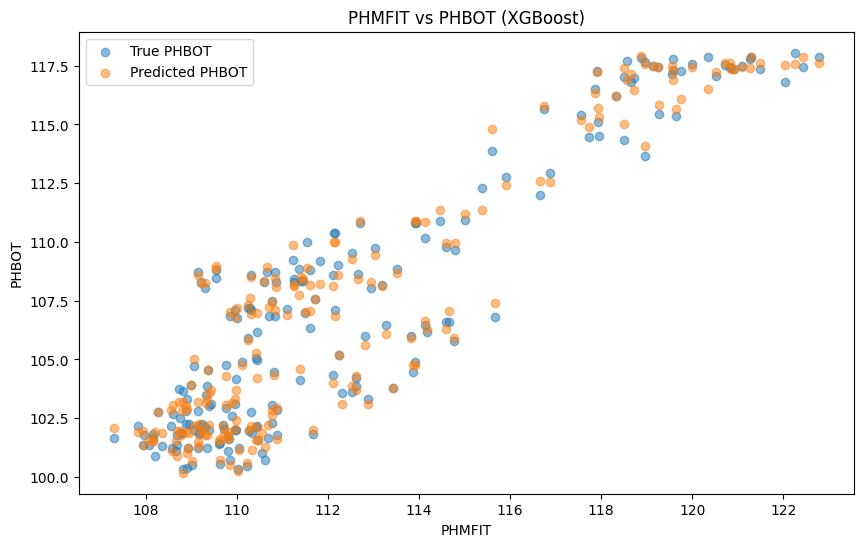

In [26]:
# plot PHMFIT against PHBOT, for true and predicted values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PHMFIT'], y_test, label='True PHBOT', alpha
=0.5)
plt.scatter(X_test['PHMFIT'], y_pred_xgb, label='Predicted PHBOT',
            alpha=0.5)
plt.xlabel('PHMFIT')
plt.ylabel('PHBOT')
plt.legend()
plt.title('PHMFIT vs PHBOT (XGBoost)')
plt.show()

In [33]:
from sklearn.neural_network import MLPRegressor

# Train a neural network regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=5000, random_state=42)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLPRegressor Mean Squared Error: {mse_mlp:.2f}")

MLPRegressor Mean Squared Error: 2.12


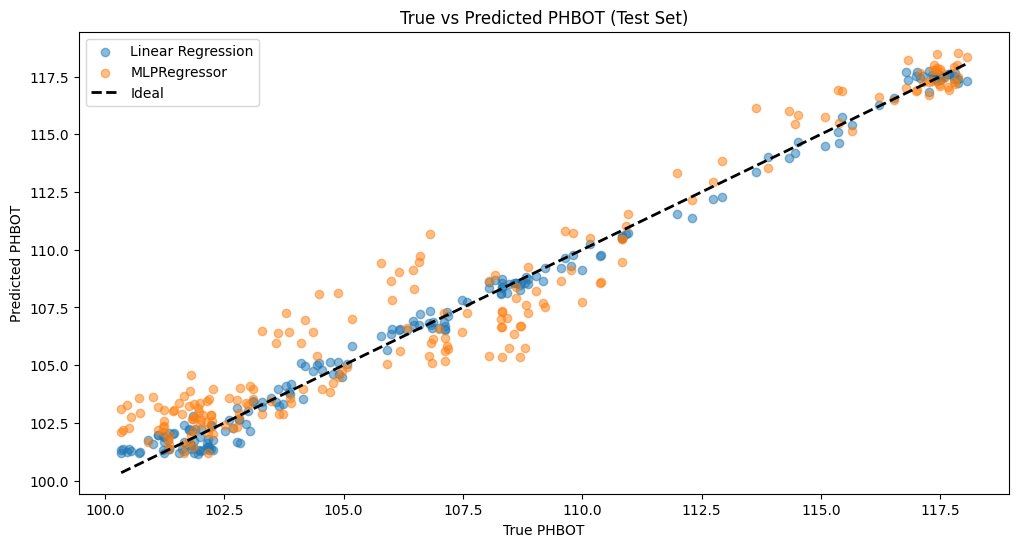

In [34]:
# Visualize the true vs predicted values for all models

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_mlp, alpha=0.5, label='MLPRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('True PHBOT')
plt.ylabel('Predicted PHBOT')
plt.title('True vs Predicted PHBOT (Test Set)')
plt.legend()
plt.show()

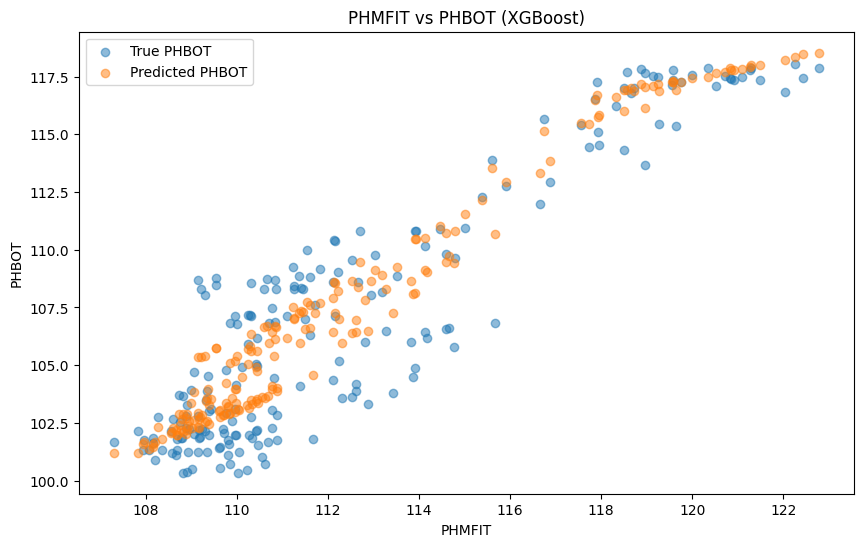

In [35]:
# plot PHMFIT against PHBOT, for true and predicted values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PHMFIT'], y_test, label='True PHBOT', alpha
=0.5)
plt.scatter(X_test['PHMFIT'], y_pred_mlp, label='Predicted PHBOT',
            alpha=0.5)
plt.xlabel('PHMFIT')
plt.ylabel('PHBOT')
plt.legend()
plt.title('PHMFIT vs PHBOT (XGBoost)')
plt.show()